In [30]:
from sklearn import datasets, model_selection, tree, metrics, ensemble
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.load_digits()

In [3]:
data, target = dataset['data'], dataset['target']

In [4]:
data.shape, target.shape

((1797, 64), (1797,))

In [56]:
def write_anwer(file_name, answer):
    with open(file_name, 'w') as f:
        f.write(str(answer))

## 1

In [5]:
clf = tree.DecisionTreeClassifier()

In [6]:
c_v_s_1 = model_selection.cross_val_score(clf, data, target, cv=10)

In [7]:
c_v_s_1.mean()

0.8163407821229051

In [59]:
write_anwer('1.txt', c_v_s_1.mean())

## 2

In [8]:
bagging_1 = ensemble.BaggingClassifier(base_estimator=clf,
                                     n_estimators=100)

In [9]:
c_v_s_2 = model_selection.cross_val_score(bagging_1, data, target, cv=10)

In [10]:
c_v_s_2.mean()

0.9281874612042209

In [58]:
write_anwer('2.txt', c_v_s_2.mean())

## 3

In [15]:
bagging_2 = ensemble.BaggingClassifier(base_estimator=clf,
                                       n_estimators=100,
                                       max_features=int(np.sqrt(data.shape[1])))

In [16]:
c_v_s_3 = model_selection.cross_val_score(bagging_2, data, target, cv=10)

In [17]:
c_v_s_3.mean()

0.9265456238361267

In [60]:
write_anwer('3.txt', c_v_s_3.mean())

## 4

In [18]:
clf_2 = tree.DecisionTreeClassifier(max_features=int(np.sqrt(data.shape[1])))

In [20]:
bagging_3 = ensemble.BaggingClassifier(base_estimator=clf_2,
                                       n_estimators=100)

In [21]:
c_v_s_4 = model_selection.cross_val_score(bagging_3, data, target, cv=10)

In [22]:
c_v_s_4.mean()

0.952122905027933

In [61]:
write_anwer('4.txt', c_v_s_4.mean())

## 5

In [23]:
rf = ensemble.RandomForestClassifier()

In [24]:
c_v_s_5 = model_selection.cross_val_score(rf, data, target, cv=10)

In [25]:
c_v_s_5.mean()

0.9460180012414648

### 5.1 Оценим зависимость качества случайного леса от количества деревьев

In [33]:
n_trees = np.arange(10, 200, 10)
scores = np.zeros(n_trees.size)

In [34]:
for i in range(n_trees.size):
    clf_ = ensemble.RandomForestClassifier(n_estimators=n_trees[i])
    c_v_s_ = model_selection.cross_val_score(clf_,
                                             data,
                                             target,
                                             cv=10)
    scores[i] = c_v_s_.mean()

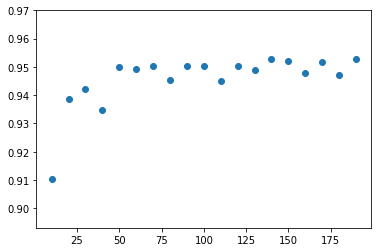

In [36]:
plt.scatter(n_trees, scores)

### 5.2 Оценим зависимость качетсва случайного леса от количества признаков

In [49]:
n_features = ['auto', 'log2', None]
scores_2 = np.zeros(len(n_features))

In [50]:
for i in range(len(n_features)):
    clf_ = ensemble.RandomForestClassifier(max_features=n_features[i])
    c_v_s_ = model_selection.cross_val_score(clf_,
                                             data,
                                             target,
                                             cv=10)
    scores_2[i] = c_v_s_.mean()

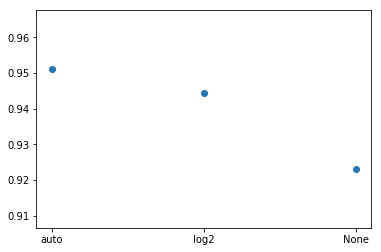

In [51]:
n_features[2] = 'None'
plt.scatter(n_features, scores_2)

### 5.3  Оценим зависимость качетсва случайного леса от глубины деревьев

In [53]:
n_depths = np.arange(1, 15, 1)
scores_3 = np.zeros(n_depths.size)

In [54]:
for i in range(n_depths.size):
    clf_ = ensemble.RandomForestClassifier(max_depth=n_depths[i])
    c_v_s_ = model_selection.cross_val_score(clf_,
                                             data,
                                             target,
                                             cv=10)
    scores_3[i] = c_v_s_.mean()

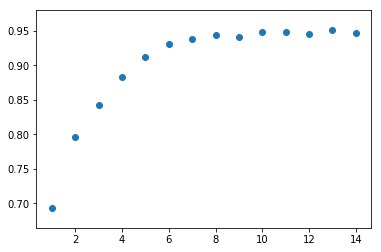

In [55]:
plt.scatter(n_depths, scores_3)

In [62]:
with open('5.txt', 'w') as f:
    f.write('2 3 4 7')